In [2]:
import numpy as np
import matplotlib.pyplot as plt

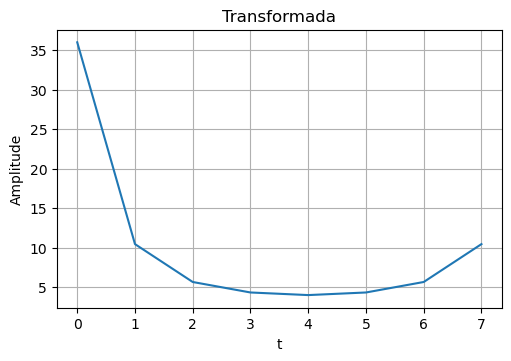

In [26]:
# Transformada discreta de Fourier (TDF)

signal = [1, 2, 3, 4, 5, 6, 7, 8]

N = len(signal)
spectra = []

for k in range(N):
    re = 0
    im = 0
    
    for n in range(N):
        angle = 2*np.pi*k*n/N
        re += signal[n]*np.cos(angle)
        im += signal[n]*np.sin(angle)

    spectra.append((re, im))
    
amp = [np.sqrt(re**2 + im**2) for re, im in spectra]

fig, ax = plt.subplots(1, 1, figsize = (5, 3.5), layout = "constrained")

ax.plot(amp)
ax.set_title("Transformada")
ax.set_xlabel("t")
ax.set_ylabel("Amplitude")
ax.grid()

plt.show()

In [8]:
tasaMuestra = 44100
duracion = 2
frecuencias = [261.63, 329.63, 392]
t = np.linspace(0,duracion, int(tasaMuestra*duracion))

signal2 = sum(np.sin(3*np.pi*f*t) for f in frecuencias)
envolvente = np.exp(-2*t)
signal2 *= envolvente

N = len(signal2)
spectra = []

# for k in range(N):
#     re = 0
#     im = 0
    
#     for n in range(N):
#         angle = 2*np.pi*k*n/N
#         re += signal2[n]*np.cos(angle)
#         im += signal2[n]*np.sin(angle)

#     spectra.append((re, im))
    
# amp = [np.sqrt(re**2 + im**2) for re, im in spectra]

# fig, ax = plt.subplots(1, 2, figsize = (10, 4), layout = "constrained")

# ax[0].plot(t, signal2)
# ax[0].set_title("Transformada")
# ax[0].set_xlabel("t")
# ax[0].set_ylabel("Amplitude")
# ax[0].grid()
# ax[1].plot(amp)
# ax[1].set_title("Transformada")
# ax[1].set_xlabel("t")
# ax[1].set_ylabel("Amplitude")
# ax[1].grid()

# plt.show()

In [9]:
def FFT(signal):
    N = len(signal)
    if N <= 1:
        return signal
    even = FFT(signal[0::2])
    odd = FFT(signal[1::2])
    spectra = np.zeros(N, dtype = "complex")

    for k in range(N//2):
        angle = -2*np.pi*k/N
        factor = odd[k]*complex(np.cos(angle), np.sin(angle))
        spectra[k] = even[k] + factor
        spectra[k+(N//2)] = even[k] - factor

    return spectra

def FFTFrec(N, d):
    frecuencies = []

    for i in range(N):
        if i <= N//2:
            freq = i/(N*d)
            
        else:
            freq = (i - N)/(N*d)

        frecuencies.append(freq)

    return frecuencies

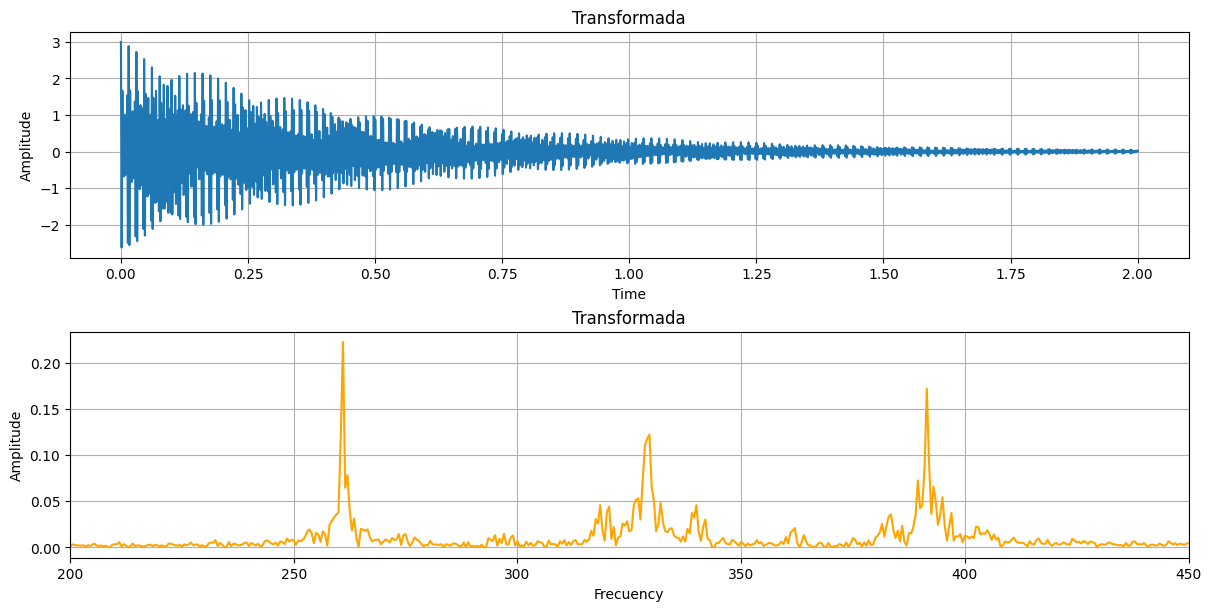

In [10]:
tasaMuestra = 44100
duracion = 2
frecuencias = [261.63, 329.63, 392]
t = np.linspace(0,duracion, int(tasaMuestra*duracion))

signal2 = sum(np.cos(2*np.pi*f*t) for f in frecuencias)
envolvente = np.exp(-2*t)
signal2 *= envolvente

N = len(signal2)
spectra = []

results = FFT(signal2)
# N = len(signal2)
amp = [abs(x)*(2/len(results)) for x in results]
amp = amp[:N//2]
frecuencies = FFTFrec(N, d=1/tasaMuestra)[:N//2]
fig, ax = plt.subplots(2, 1, figsize = (12, 6), layout = "constrained")

ax[0].plot(t, signal2)
ax[0].set_title("Transformada")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")
ax[0].grid()
ax[1].plot(frecuencies, amp, color="orange")
ax[1].set_title("Transformada")
ax[1].set_xlabel("Frecuency")
ax[1].set_ylabel("Amplitude")
ax[1].set_xlim([200,450])
ax[1].grid()

In [89]:
pIndex = np.argmax(results)
major_frec = frecuencies[pIndex]
print(major_frec)

261.0
